# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="bitcoin", language="en")
# Total articles
print(f"Total articles about oil: {btc_articles['totalResults']}")
# Sample article
btc_articles["articles"][0]

Total articles about oil: 4321


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Nicole Lee',
 'title': 'Tampa teenager arrested for Twitter Bitcoin hack',
 'description': 'Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name has not been revealed due to his underage status. According t…',
 'url': 'https://www.engadget.com/teenager-arrested-twitter-bitcoin-hack-183302700.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-images%2F2020-07%2F80319ad0-c77f-11ea-adfe-d560f6400e1e&client=amp-blogside-v2&signature=3ae5e1a0ea67905f52a03c1a851c07fc1c61bdbb',
 'publishedAt': '2020-07-31T18:33:02Z',
 'content': 'Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-prof

In [32]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q='ethereum', 
    language='en',
    page_size=100,
    sort_by='relevancy'
)
# Total articles
print(f"Total articles about oil: {eth_articles['totalResults']}")
# Sample article
eth_articles["articles"][0]

Total articles about oil: 1270


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'Master blockchain with this cheap online course',
 'description': "TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\n\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and blockchain technologies (which power things like Bitcoin and Eth…",
 'url': 'https://mashable.com/uk/shopping/aug-17-mega-blockchain-mastery-bundle/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F08%252F17%252F40%252F5fe1250a25cd46bca29df0fa3c2e813f.4539c.png%252F1200x630.png?signature=PeH92TKb8dmntUe5Zygr2icxP4o=',
 'publishedAt': '2020-08-17T04:00:00Z',
 'content': "TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars]"}

In [35]:
# Bitcoin DataFrame
btc_df = pd.DataFrame.from_dict(btc_articles["articles"])
btc_df.head(1)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Nicole Lee,Tampa teenager arrested for Twitter Bitcoin hack,"Authorities in Tampa, Florida have arrested a ...",https://www.engadget.com/teenager-arrested-twi...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-07-31T18:33:02Z,"Authorities in Tampa, Florida have arrested a ..."


In [36]:
# Bitcoin sentiment scores DataFrame
btc_sentiments = []
for article in btc_articles['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu  
        })
    except AttributeError:
        pass
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)
# Order DataFrame columns
cols = ['date','text','compound','positive','negative','neutral']
btc_df = btc_df[cols]
btc_df.head(-1)

,date,text,compound,positive,negative,neutral
0,2020-07-31,"Authorities in Tampa, Florida have arrested a ...",-0.4767,0.000,0.094,0.906
1,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
2,2020-08-01,"On July 15, a Discord user with the handle Kir...",-0.4019,0.000,0.074,0.926
3,2020-08-03,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000
4,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
5,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878
6,2020-07-31,Earlier this month a number of Twitter account...,0.6249,0.184,0.000,0.816
7,2020-07-31,Hillsborough State Attorney Andrew Warren anno...,-0.6808,0.000,0.157,0.843
8,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937
9,2020-07-31,(CNN)A teenager in Tampa was arrested and char...,-0.0258,0.118,0.120,0.762


In [39]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []
for article in eth_articles['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu  
        })
    except AttributeError:
        pass
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)
# Order DataFrame columns
cols = ['date','text','compound','positive','negative','neutral']
eth_df = eth_df[cols]
eth_df.head(-1)

,date,text,compound,positive,negative,neutral
0,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000
1,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819
2,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000
3,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881
4,2020-08-14,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,0.3400,0.072,0.000,0.928
...,...,...,...,...,...,...
90,2020-08-07,Ethereum Classic’s second 51% attack Thursday ...,0.1779,0.164,0.144,0.692
91,2020-08-10,"With the price of bitcoin knocking on $12K, Co...",0.0000,0.000,0.000,1.000
92,2020-08-14,What happened\r\nShares of Ebang International...,0.2960,0.075,0.000,0.925
93,2020-08-27,Decentralized finance (DeFi) continues to expa...,0.6124,0.152,0.000,0.848


In [43]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.183730,0.077000,0.03530,0.88770
std,0.454846,0.063035,0.05445,0.05650
min,-0.680800,0.000000,0.00000,0.76200
25%,-0.070700,0.000000,0.00000,0.85475
50%,0.350000,0.081500,0.00000,0.90800
75%,0.507900,0.119000,0.07175,0.92625
max,0.750600,0.198000,0.15700,1.00000


In [44]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.095785,0.060698,0.040188,0.899125
std,0.407140,0.064925,0.058707,0.081009
min,-0.851900,0.000000,0.000000,0.692000
25%,-0.102700,0.000000,0.000000,0.851000
50%,0.000000,0.060000,0.000000,0.913000
75%,0.421500,0.090250,0.072000,0.952000
max,0.817600,0.270000,0.262000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

    A: Bitcoin: .077

Q: Which coin had the highest compound score?

    A: Ethereum: .8176

Q. Which coin had the highest positive score?

    A: Ethereum: .27

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
lemmatizer = WordNetLemmatizer()

In [42]:
article = btc_articles['articles'][0]['description']

In [43]:
# Define function
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [46]:
process_text(article)

['authorities',
 'tampa',
 'florida',
 'arrested',
 'yearold',
 'alleged',
 'mastermind',
 'behind',
 'twitter',
 'bitcoin',
 'hack',
 'targeted',
 'several',
 'highprofile',
 'account',
 'july',
 'th',
 'name',
 'ha',
 'revealed',
 'due',
 'underage',
 'status',
 'according']

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [53]:
from collections import Counter
from nltk import ngrams

In [54]:
processed = process_text(article)
print(processed)

['authorities', 'tampa', 'florida', 'arrested', 'yearold', 'alleged', 'mastermind', 'behind', 'twitter', 'bitcoin', 'hack', 'targeted', 'several', 'highprofile', 'account', 'july', 'th', 'name', 'ha', 'revealed', 'due', 'underage', 'status', 'according']


In [55]:
word_counts = Counter(processed)
print(dict(word_counts))

{'authorities': 1, 'tampa': 1, 'florida': 1, 'arrested': 1, 'yearold': 1, 'alleged': 1, 'mastermind': 1, 'behind': 1, 'twitter': 1, 'bitcoin': 1, 'hack': 1, 'targeted': 1, 'several': 1, 'highprofile': 1, 'account': 1, 'july': 1, 'th': 1, 'name': 1, 'ha': 1, 'revealed': 1, 'due': 1, 'underage': 1, 'status': 1, 'according': 1}


In [56]:
bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

{('authorities', 'tampa'): 1, ('tampa', 'florida'): 1, ('florida', 'arrested'): 1, ('arrested', 'yearold'): 1, ('yearold', 'alleged'): 1, ('alleged', 'mastermind'): 1, ('mastermind', 'behind'): 1, ('behind', 'twitter'): 1, ('twitter', 'bitcoin'): 1, ('bitcoin', 'hack'): 1, ('hack', 'targeted'): 1, ('targeted', 'several'): 1, ('several', 'highprofile'): 1, ('highprofile', 'account'): 1, ('account', 'july'): 1, ('july', 'th'): 1, ('th', 'name'): 1, ('name', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'due'): 1, ('due', 'underage'): 1, ('underage', 'status'): 1, ('status', 'according'): 1}


In [57]:
print(dict(bigram_counts.most_common(10)))

{('authorities', 'tampa'): 1, ('tampa', 'florida'): 1, ('florida', 'arrested'): 1, ('arrested', 'yearold'): 1, ('yearold', 'alleged'): 1, ('alleged', 'mastermind'): 1, ('mastermind', 'behind'): 1, ('behind', 'twitter'): 1, ('twitter', 'bitcoin'): 1, ('bitcoin', 'hack'): 1}


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [76]:
corpus = btc_articles

In [77]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [78]:
big_string = ' '.join(corpus)
input_text = process_text(big_string)

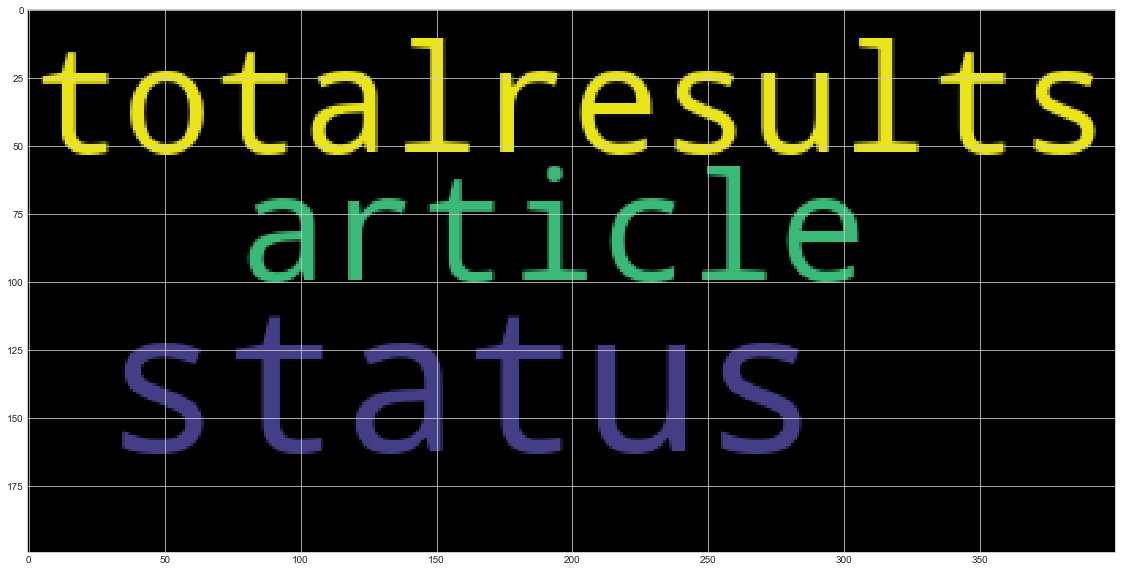

In [79]:
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [80]:
import spacy
from spacy import displacy
import matplotlib.pyplot as plt 

nlp = spacy.load("en_core_web_sm")

In [81]:
article = btc_articles['articles'][0]['description']

In [82]:
doc = nlp(article)
displacy.render(doc, style='ent')